In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
os.environ['PROJ_LIB'] = r'C:\ProgramData\Anaconda3\pkgs\proj4-5.2.0-h6538335_1006\Library\share'
from mpl_toolkits.basemap import Basemap, shiftgrid
import netCDF4 as nc

file = nc.Dataset(r'F:\\annu_solar\adaptor.mars.internal-1586703871.8317773-2032-27-799c0f7c-3f80-457f-a3af-23c5f49225fb.nc');
file.variables

OrderedDict([('longitude',
              <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  units: degrees_east
                  long_name: longitude
              unlimited dimensions: 
              current shape = (301,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('latitude',
              <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  units: degrees_north
                  long_name: latitude
              unlimited dimensions: 
              current shape = (321,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time',
              <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: hours since 1900-01-01 00:00:00.0
                  long_name: time
                  calendar: gregorian
              unlimited dimensions: 
              current shape = (144,)

In [2]:
lat=file.variables['latitude'][:]
long=file.variables['longitude'][:]
time=file.variables['time'][:]
file.variables['ssr']=file.variables['ssr'][:,:]/(3600*24)
solar=file.variables['ssr'][:,:]
print(lat.shape,long.shape,time.shape,solar.shape)
info=pd.DataFrame({'latitude':lat})
info

(321,) (301,) (144,) (144, 321, 301)


,latitude
0,38.000000
1,37.900002
2,37.799999
3,37.700001
4,37.599998
...,...
316,6.400000
317,6.300000
318,6.200000
319,6.100000


In [19]:
lat=np.sort(lat)
lon=np.sort(long)
z=np.arange(12)
#f = nc.Dataset('sample.nc','w', format='NETCDF4')


IndexError: too many indices for array

In [4]:
tempgrp = f.createGroup('Temp_data')


tempgrp.createDimension('lon', len(lon))
tempgrp.createDimension('lat', len(lat))
tempgrp.createDimension('z', len(z))

<class 'netCDF4._netCDF4.Dimension'>: name = 'z', size = 12

In [5]:
longitude = tempgrp.createVariable('Longi', 'f4', 'lon')
latitude = tempgrp.createVariable('Lati', 'f4', 'lat')  
levels = tempgrp.createVariable('Level', 'i4', 'z')
temp = tempgrp.createVariable('Temp', 'f4', ( 'lon', 'lat', 'z'))


In [6]:
print(f)

print(f.groups['Temp_data'])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: Temp_data

<class 'netCDF4._netCDF4.Group'>
group /Temp_data:
    dimensions(sizes): lon(301), lat(321), z(12)
    variables(dimensions): float32 Longi(lon), float32 Lati(lat), int32 Level(z), float32 Temp(lon,lat,z)
    groups: 



In [10]:
longitude[:] = lon #The "[:]" at the end of the variable instance is necessary
latitude[:] = lat
levels[:] = z
for i in range(12):
    temp[:,:,i] = solar[i,:,:]


In [11]:
f.close()

In [15]:
f=nc.Dataset('sample.nc')
d=f.groups['Temp_data']

In [18]:
a=d.variables['Temp'][:,:,0]

In [19]:
a

masked_array(
  data=[[174.92922973632812, 180.14462280273438, 180.6162872314453, ...,
         173.1786651611328, 172.19906616210938, 171.90428161621094],
        [176.56187438964844, 184.0448455810547, 185.57318115234375, ...,
         46.78898620605469, 41.99988555908203, 42.06791305541992],
        [42.163150787353516, 42.27199172973633, 42.18128967285156, ...,
         75.10183715820312, 74.2537612915039, 72.36260986328125],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=9.96921e+36,
  dtype=float32)

In [31]:
solar[2,:,:]

masked_array(
  data=[[2.5807577070967388e-09, 2.7265632272716525e-09,
         2.8140465393766703e-09, ..., 4.53892584304647e-08,
         4.396036433275006e-08, 4.2108634226528095e-08],
        [2.4786938429742292e-09, 2.624499363149213e-09,
         2.6099188111317215e-09, ..., 4.725556908870415e-08,
         4.671608866405683e-08, 4.610370547932199e-08],
        [2.4057910828867723e-09, 2.4641132909567382e-09,
         2.4786938429742292e-09, ..., 5.2446245606932684e-08,
         5.155683193386543e-08, 5.085696543702564e-08],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ..., 

In [6]:
day1=solar[0:144,:,:]
t=np.zeros(144)
g=np.zeros(144)
h=np.zeros(144)
for i in range(144):
    a=day1[i,:,:]
    b=a/3600
    g[i]=np.average(b)
    t[i]=np.max(b)
    h[i]=np.min(b)


In [7]:
z=solar[0:100,153,97]
avgday1=np.nanmean(day1,axis=0)
avgday1=avgday1/3600
avgday1.shape
p=z/3600
info=pd.DataFrame({'lat27.7_long77.7_100hr_values':p})
info.to_csv('F:\\ssr_100hr.csv')
info

,lat27.7_long77.7_100hr_values
0,5974.622998
1,2.285708
2,101.768427
3,394.230207
4,880.977165
...,...
95,5267.577326
96,5267.577326
97,3.374140
98,105.904470


In [8]:
ssr=pd.DataFrame({' max':t,'min':h,'average_over_india':g})
pd.options.display.max_rows=999
pd.set_option('display.float_format',lambda x: '%.2f'%x)
ssr.to_csv('F:\\annu_solar.csv')
ssr

,max,min,average_over_india
0,7071.98,527.02,4411.66
1,165.12,-0.00,24.91
2,543.02,2.18,141.22
3,1141.44,19.16,403.20
4,1911.18,43.97,808.77
5,2785.08,93.28,1332.79
6,3676.40,167.73,1933.00
7,4502.19,252.84,2558.71
8,5251.69,358.31,3154.04
9,5942.84,454.20,3679.84


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


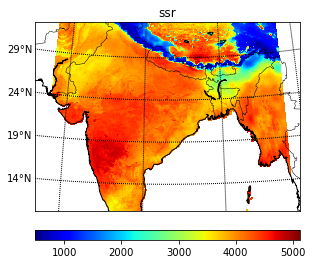

In [11]:

lon_0=long.mean()
lat_0=lat.mean()


m=Basemap(width=3500000,height=2500000,resolution='l',projection='stere',\
          lat_ts=40,lat_0=lat_0,lon_0=lon_0)
lon,latitude=np.meshgrid(long,lat)
xi,yi=m(lon,latitude)

#plot data
cs=m.pcolor(xi,yi,np.squeeze(avgday1), cmap='jet')

#add grid lines
m.drawparallels(np.arange(-81.,80.,5.),labels=[1,0,0,0],fontsize=10)
m.drawmeridians(np.arange(-180.,181.,10.),labels=[1,0,0,0],fontsize=10)

m.drawcoastlines()
m.drawstates()
m.drawcountries()

cbar=m.colorbar(cs,location='bottom',pad="10%")


#title
plt.title('ssr')
plt.show()
